In [113]:
#구글 드라이브 임포트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [115]:
card_df = pd.read_csv('/content/drive/MyDrive/아이펠/data/fraud.csv')

In [116]:
pd.set_option('display.max_columns', 50)

In [117]:
card_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [118]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [119]:
card_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [120]:
card_df.isna().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [121]:
card_df['category'].value_counts()

,count
category,
shopping_pos,48345
gas_transport,46029
home,43340
grocery_pos,42722
kids_pets,40295
shopping_net,39179
food_dining,35980
personal_care,35513
entertainment,33619


In [122]:
card_df.duplicated().sum()

0

In [123]:
card_df.tail(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
491124,2020-12-31 23:43:07,30238755902988,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,7.43,Danielle,Yu,F,5395 Colon Burgs Suite 037,Thrall,TX,76578,30.5920,-97.2893,1766,Press sub,1976-01-02,d0f906757e93b9d51c757b8a8b8d27ea,1388533387,29.831181,-97.742957,0
491125,2020-12-31 23:47:11,6011724471098086,fraud_Altenwerth-Kilback,home,47.05,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1fa626c083dfb1b3296fec4c5877f5cb,1388533631,45.716706,-119.886246,0
491126,2020-12-31 23:48:28,5540636818935089,fraud_Kemmer-Buckridge,misc_pos,51.86,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,a3410c6339913a60612c9bedde9fa476,1388533708,42.237331,-70.419494,0
491127,2020-12-31 23:50:34,371226440126102,fraud_Cartwright PLC,kids_pets,43.54,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,Mulberry Grove,IL,62262,38.9311,-89.2463,1810,Race relations officer,1974-12-24,c1869fcb0b70ba02f9e8811b920dd8ab,1388533834,39.121026,-88.866295,0
491128,2020-12-31 23:54:12,3518669219150142,fraud_Berge-Hills,kids_pets,23.24,Dorothy,Thomas,F,537 Rice Square Suite 040,Milford,OH,45150,39.1657,-84.2330,31394,Hospital doctor,1996-11-12,e614e054201302dd73f32a3aec38bf0e,1388534052,38.653037,-84.419288,0
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


<Axes: xlabel='amt'>

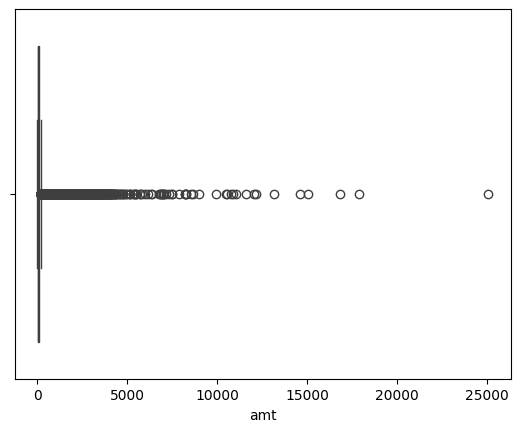

In [124]:
#amt 변수의 이상치 박스플

sns.boxplot(x=card_df['amt'])


In [125]:
#amt가 15,000이상인 값 확인 해보기
card_df[card_df['amt']>=15000]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
49446,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,Gina,Grimes,F,444 Robert Mews,Clarks Mills,PA,16114,41.3851,-80.1752,606,Energy manager,1997-09-22,1c9f2b574fb9bf860c76ea200252fe05,1333812743,41.361042,-79.665772,0
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0
198719,2019-11-17 20:00:17,2264937662466770,fraud_Goyette-Herzog,travel,15047.03,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,1995-10-17,969e374d8c4e1a628b60150391a70742,1353182417,29.849413,-98.224021,0
410031,2020-09-21 12:02:00,3566094707272327,fraud_Johnston-Casper,travel,16837.08,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,Newhall,CA,91321,34.3795,-118.5230,34882,Health physicist,1971-04-25,ba246b12f894ab083706e72f9d90ad15,1379764920,35.111725,-118.128435,0


In [126]:
card_df = card_df.drop(card_df[card_df['amt']>=15000].index, axis=0)

<Axes: xlabel='amt'>

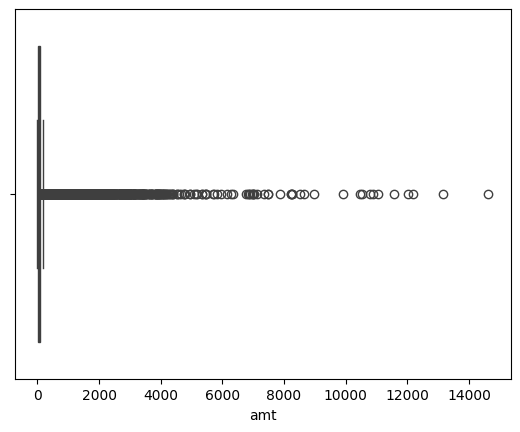

In [127]:
sns.boxplot(x=card_df['amt'])

#	trans_date_trans_time	날짜 형식으로 바꾸기

In [128]:
card_df['trans_date_trans_time'] = pd.to_datetime(card_df['trans_date_trans_time'])

피처변수 만들기

In [129]:
# 날짜/시간 관련 피처 생성
card_df['trans_date'] = card_df['trans_date_trans_time'].dt.date
card_df['trans_time'] = card_df['trans_date_trans_time'].dt.time
card_df['trans_dayofweek'] = card_df['trans_date_trans_time'].dt.dayofweek



In [130]:
card_df = card_df.drop('trans_date_trans_time', axis=1)

In [131]:
card_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_dayofweek
0,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,1
1,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,00:12:34,1
2,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,00:17:16,1
3,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,00:20:15,1
4,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,00:23:41,1


In [132]:
#데이터 분리하기 cc_num 과 first~dob까지 분리해서 따로 저장하기쳐
custumer_df = card_df[['cc_num']].join(card_df.loc[:,'first':'dob'])

In [133]:
custumer_df

,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,630423337322,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21
1,4956828990005111019,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21
2,180048185037117,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19
3,374930071163758,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05
4,2712209726293386,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08
491130,213112402583773,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03
491131,3556613125071656,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27
491132,6011724471098086,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29


In [134]:
#card_df에서 fisrt:dob까지 삭제하기
card_df = card_df.drop(card_df.loc[:,'first':'dob'], axis=1)

In [135]:
card_df.head()

,cc_num,merchant,category,amt,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_dayofweek
0,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,1
1,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,00:12:34,1
2,180048185037117,fraud_Kling-Grant,grocery_net,46.28,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,00:17:16,1
3,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,00:20:15,1
4,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,00:23:41,1
